# Lecture 3: Edge Detection


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import sobel
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap']='gray'
import warnings
warnings.filterwarnings(action='ignore')


## Object by their surface

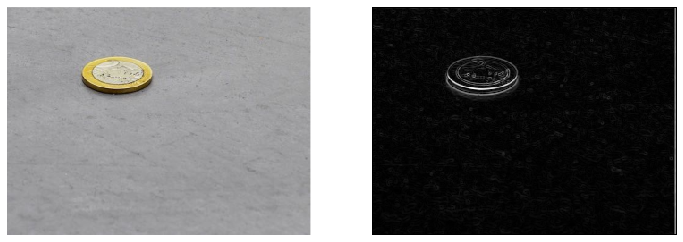

In [68]:
#reading the image
from skimage.color import rgb2gray
money = imread("images/03_money.png")
money_edge = sobel(rgb2gray(money))

def plot_images(Img):
    """
    Tool function to plot images
    """
    fig,axs = plt.subplots(1,len(Img),figsize=(12,6))
    
    for ax, img in zip(axs, Img):
        ax.imshow(img)
        ax.axis('off')
plot_images([money, money_edge])

## Partial derivative of an Image
Let try to understand the effect of an horizontal derivative $[1, -1]$
on a image

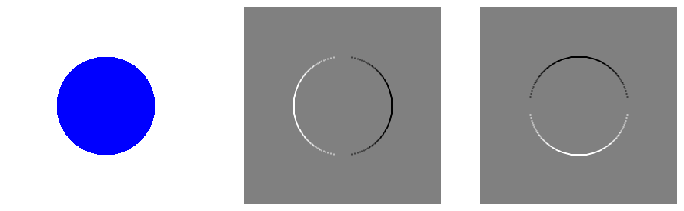

In [75]:
from skimage.draw import circle, rectangle
from scipy.ndimage.filters import convolve
def object_inside(square=True):
    """
    Image with an object inside 
    """
    n = 256
    Img = 255*np.ones((n,n,3),dtype=np.uint)
    
    #object
    if square:
        ox, oy = rectangle((n//4, n//4), extent=(n//2, n//2))
    else:
        ox, oy = circle(n//2,n//2, n//4)
    Img[ox,oy,:] = [0,0,255]
    return Img

kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Img = object_inside(False)
H_edge = convolve(rgb2gray(Img), kernel_x)
V_edge = convolve(rgb2gray(Img), kernel_y)

plot_images([Img,H_edge, V_edge])

## Gradient Strenght map

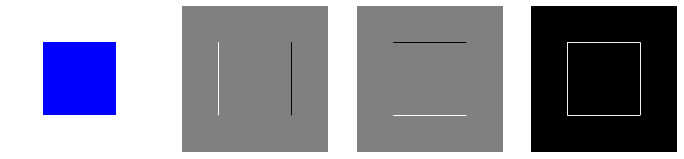

In [77]:
Img = object_inside(square=True)
Img_rgb = rgb2gray(Img)
Grad_x = convolve(Img_rgb, kernel_x)
Grad_y = convolve(Img_rgb, kernel_y)
ESM    = np.sqrt(Grad_x**2 + Grad_y**2)  #edge strenght map

plot_images([Img, Grad_x, Grad_y, ESM])

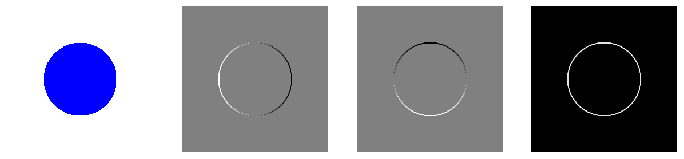

In [78]:
Img = object_inside(square=False)
Img_rgb = rgb2gray(Img)
Grad_x = convolve(Img_rgb, kernel_x)
Grad_y = convolve(Img_rgb, kernel_y)
ESM    = np.sqrt(Grad_x**2 + Grad_y**2)  #edge strenght map

plot_images([Img, Grad_x, Grad_y, ESM])

## Effect of noise

In [95]:
def two_squares(sigma=0.1):
    """
    Function to construct a two squares with noise
    """
    
    Img = np.zeros((256,256))
    Img[:,:128] = 1
    
    #adding noise
    Img += np.random.normal(scale=sigma, size= Img.shape)
    return Img 

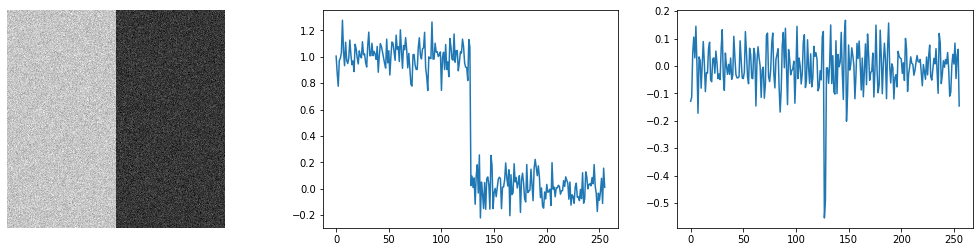

In [104]:
Img = two_squares()
fig,axs = plt.subplots(1,3,figsize=(18,4))
#images
axs[0].imshow(Img)
axs[0].axis('off')

#coupe
sig = Img[128,:]
axs[1].plot(sig)

#gradient
grad = np.gradient(sig)
axs[2].plot(grad)

## Filtering with Gaussian

Text(0, 0.5, '$\\dfrac{\\partial}{\\partial x}h*f$')

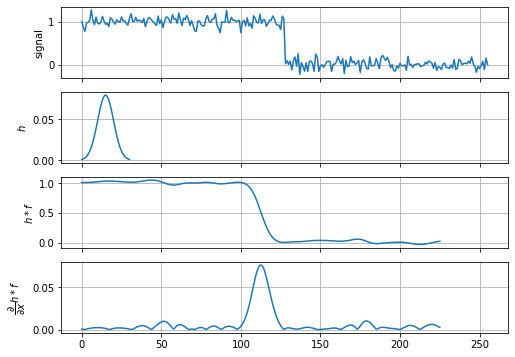

In [149]:
from tools import Gaussian_kernel
fig,axs = plt.subplots(4,1, figsize=(8,6),sharex=True)
for ax in axs:
    ax.grid()
#initial
axs[0].plot(sig)
axs[0].set_ylabel("signal")

#gaussian kernel
kernel = Gaussian_kernel(sigma=5)
axs[1].plot(kernel) 
axs[1].set_ylabel(r"$h$")

#filtering 
conv = np.convolve(sig, kernel, mode='valid')
axs[2].plot(conv)
axs[2].set_ylabel(r"$h * f$")

#gradient
grad_conv = np.abs(np.gradient(conv))
axs[3].plot(grad_conv)
axs[3].set_ylabel(r"$\dfrac{\partial}{\partial x}h*f$")

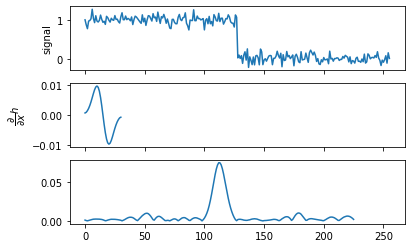

In [150]:
#convolving directly with the kernel derivative
kernel_deriv = np.gradient(kernel)

fig, axs = plt.subplots(3,1, sharex=True)

axs[0].plot(sig)
axs[0].set_ylabel('signal')
axs[1].plot(kernel_deriv)
axs[1].set_ylabel(r"$\dfrac{\partial }{\partial x} h$")
axs[2].plot(np.abs(np.convolve(sig, kernel_deriv,mode= 'valid')))


## Gaussian 2D

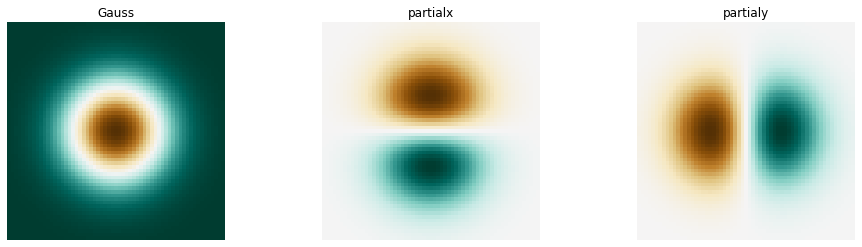

In [204]:
from tools import Gaussian_kernel_2d,partial_Gaussian_X
from mpl_toolkits.mplot3d import Axes3D
X, Y, kern = Gaussian_kernel_2d(sigma=10)
kern_x, kern_y = np.gradient(kern,axis = 0), np.gradient(kern, axis=1)
fig, axs = plt.subplots(1,3,figsize=(16,4))

for ax, Img, title in zip(axs, [kern, kern_x, kern_y], ['Gauss', 'partialx', 'partialy']):
    ax.imshow(Img, cmap=plt.cm.BrBG_r)
    ax.set_title(title)
    ax.axis('off')


## Effect of sigma

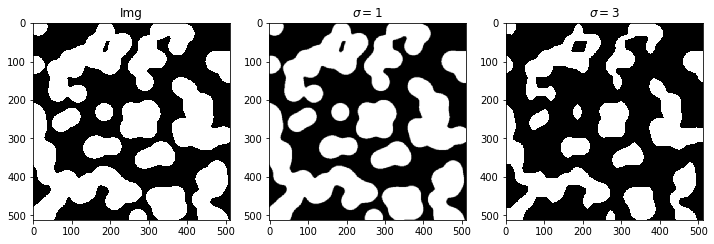

In [213]:
from skimage.data import binary_blobs
from skimage.filters import gaussian
Img = binary_blobs()

#filter 1
filtr1 = gaussian(Img,sigma=1)

filtr2 = gaussian_filter1d(Img, sigma=3)

fig,axs = plt.subplots(1,3,figsize=(12,4))

for ax, img,title in zip(axs, [Img, filtr1, filtr2], ['Img', r'$\sigma=1$',r'$\sigma=3$']):
    ax.imshow(img)
    ax.set_title(title)

## Laplacian of Gaussian

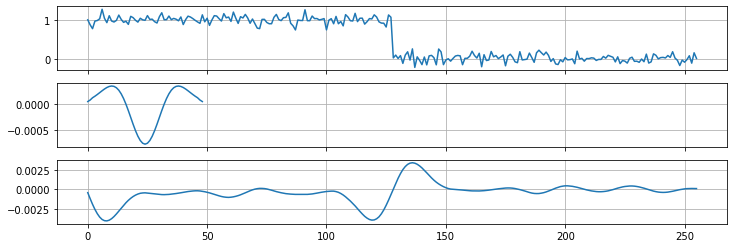

In [228]:
kern = Gaussian_kernel(sigma=8)

fig, axs = plt.subplots(3,1, figsize=(12,4),sharex=True)
kern_xx = np.gradient(np.gradient(kern))
C = np.convolve(sig, kern_xx,mode='same')
for ax, S in zip(axs, [sig,kern_xx, C]):
    ax.plot(S)
    ax.grid()

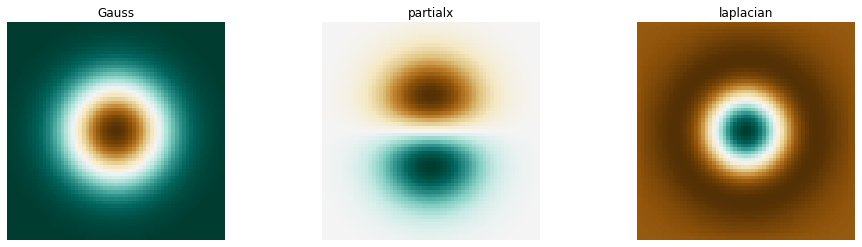

In [229]:
X, Y, kern = Gaussian_kernel_2d(sigma=10)
kern_x, kern_y = np.gradient(kern,axis = 0), np.gradient(kern, axis=1)
laplacien = np.gradient(kern_x,axis=0) + np.gradient(kern_y, axis=1)
fig, axs = plt.subplots(1,3,figsize=(16,4))

for ax, Img, title in zip(axs, [kern, kern_x, laplacien], ['Gauss', 'partialx', 'laplacian']):
    ax.imshow(Img, cmap=plt.cm.BrBG_r)
    ax.set_title(title)
    ax.axis('off')
